In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os, warnings
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/valid-images/Valid/Cats Valid/pexels-pixabay-57416.jpg
/kaggle/input/valid-images/Valid/Cats Valid/pexels-timo-volz-3643714.jpg
/kaggle/input/valid-images/Valid/Cats Valid/pexels-zhang-kaiyv-7149465.jpg
/kaggle/input/valid-images/Valid/Cats Valid/pexels-mustafa-ezz-691583.jpg
/kaggle/input/valid-images/Valid/Cats Valid/pexels-serena-koi-1576193.jpg
/kaggle/input/valid-images/Valid/Dogs Valid/pexels-tranmautritam-245035.jpg
/kaggle/input/valid-images/Valid/Dogs Valid/pexels-viridiana-o-rivera-16623474.jpg
/kaggle/input/valid-images/Valid/Dogs Valid/pexels-pixabay-46505.jpg
/kaggle/input/valid-images/Valid/Dogs Valid/pexels-svetozar-milashevich-1490908.jpg
/kaggle/input/valid-images/Valid/Dogs Valid/pexels-viridiana-o-rivera-16623449.jpg
/kaggle/input/train-images/Train/Cats Train/pexels-dominika-roseclay-2686914.jpg
/kaggle/input/train-images/Train/Cats Train/pexels-just-a-couple-photos-3777622.jpg
/kaggle/input/train-images/Train/Cats Train/pexels-alena-koval-982300.jpg
/

In [4]:
import matplotlib.pyplot as plt
from matplotlib import gridspec

import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [5]:
# Reproducability
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed()

# Setting Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore") # to clean up output cells

In [6]:
ds_train_ = image_dataset_from_directory(
    '/kaggle/input/train-images/Train',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)
ds_valid_ = image_dataset_from_directory(
    '/kaggle/input/valid-images/Valid',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
)

Found 20 files belonging to 2 classes.
Found 10 files belonging to 2 classes.


In [7]:
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = (
    ds_train_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_valid = (
    ds_valid_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

In [8]:
model = keras.Sequential([
    layers.InputLayer(input_shape=[128, 128, 3]),
    
    preprocessing.RandomFlip(mode='horizontal'),
    preprocessing.RandomRotation(factor=0.10),
    preprocessing.RandomWidth(factor=0.15),

    layers.BatchNormalization(renorm=True),
    layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),
    
    layers.BatchNormalization(renorm=True),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),

    layers.BatchNormalization(renorm=True),
    layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same', name='last_conv_layer'),
    layers.MaxPool2D(),

    layers.BatchNormalization(renorm=True),
    layers.GlobalAveragePooling2D(),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 128, 128, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 128, 128, 3)      0         
 tion)                                                           
                                                                 
 random_width (RandomWidth)  (None, 128, None, 3)      0         
                                                                 
 batch_normalization (BatchN  (None, 128, None, 3)     21        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 128, None, 64)     1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, None, 64)     0

In [9]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

In [10]:
history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=125,
)

Epoch 1/125
1/1 [==============================] - 21s 21s/step - loss: 0.6931 - binary_accuracy: 0.5000 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 2/125
1/1 [==============================] - 0s 108ms/step - loss: 0.6930 - binary_accuracy: 0.5000 - val_loss: 0.6930 - val_binary_accuracy: 0.5000
Epoch 3/125
1/1 [==============================] - 0s 106ms/step - loss: 0.6930 - binary_accuracy: 0.5000 - val_loss: 0.6930 - val_binary_accuracy: 0.5000
Epoch 4/125
1/1 [==============================] - 0s 106ms/step - loss: 0.6929 - binary_accuracy: 0.5000 - val_loss: 0.6929 - val_binary_accuracy: 0.5000
Epoch 5/125
1/1 [==============================] - 0s 106ms/step - loss: 0.6929 - binary_accuracy: 0.5000 - val_loss: 0.6929 - val_binary_accuracy: 0.5000
Epoch 6/125
1/1 [==============================] - 0s 93ms/step - loss: 0.6929 - binary_accuracy: 0.5000 - val_loss: 0.6928 - val_binary_accuracy: 0.5000
Epoch 7/125
1/1 [==============================] - 0s 93ms/step - loss: 

In [ ]:
#comment

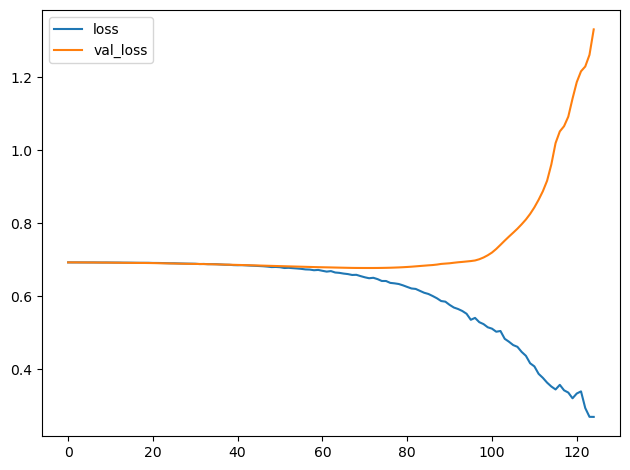

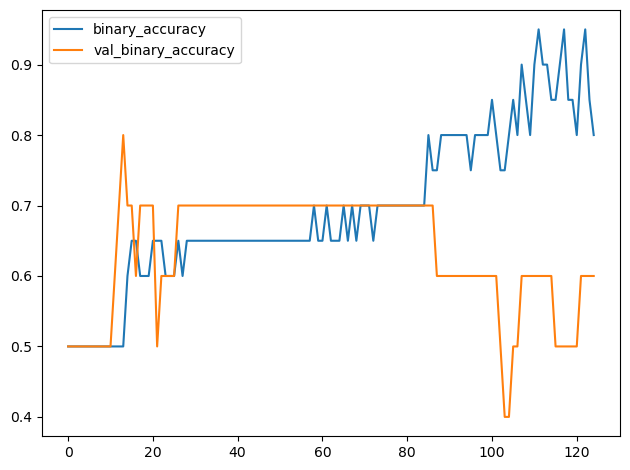

In [11]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();

In [12]:
last_conv_layer = model.get_layer('last_conv_layer')  

grad_model = tf.keras.models.Model(
    [model.inputs], [model.get_layer('last_conv_layer').output, model.output]
)

In [13]:
sample_image = next(iter(ds_valid))[0][0:1]

In [14]:
with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(sample_image)
    loss = predictions[:, 0]
    
grads = tape.gradient(loss, conv_outputs)

In [15]:
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

In [16]:
# Multiplying each channel by its corresponding gradient value
cam = tf.multiply(conv_outputs, pooled_grads)

In [17]:
heatmap = tf.reduce_mean(conv_outputs, axis=-1)

In [18]:
heatmap = tf.maximum(heatmap, 0) / tf.reduce_max(heatmap)

In [19]:
# Convert the sample image and heatmap to numpy arrays
sample_image_np = sample_image[0].numpy()
heatmap_np = heatmap[0].numpy()

In [20]:
# Normalizing the heatmap to the range [0, 255]
heatmap_np = (heatmap_np * 255).astype('uint8')

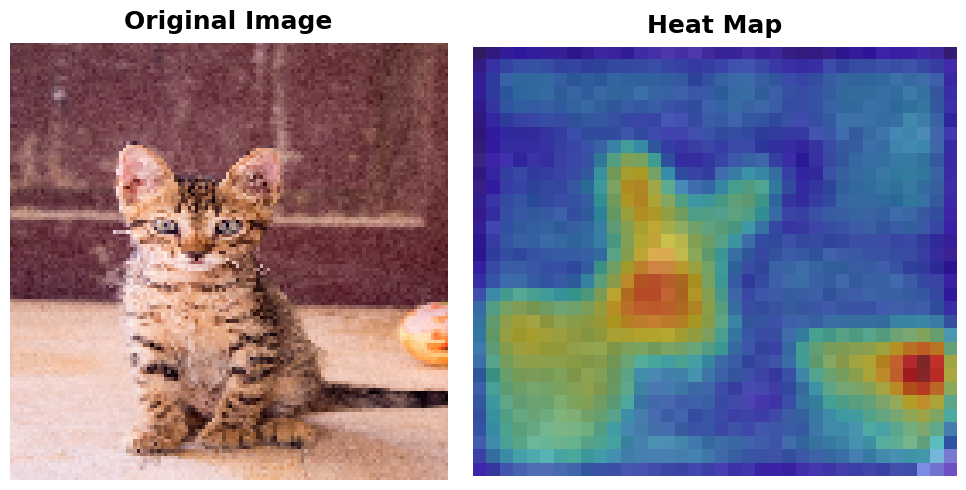

In [21]:
# Plot the original image and the heatmap
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(sample_image_np)
ax1.axis('off')
ax1.set_title('Original Image')
ax2.imshow(sample_image_np)
ax2.imshow(heatmap_np, cmap='jet', alpha=0.5)
ax2.axis('off')
ax2.set_title('Heat Map')
plt.tight_layout()
plt.show()

#plt.imshow(sample_image[0])
#plt.imshow(heatmap[0], cmap='jet', alpha=0.5)
#plt.colorbar()
#plt.show()